# Lesson 9
## Title: Functions and ‘Apply’
Objectives:

1)	Understand functions in Python; write your own functions

2)	Understand how to apply functions to arrays or table columns in Python

Reading: AD Chapter 8.1-8.2
Videos: edX Data8.1x; Lectures 9.1-9.6
Augmented Material: Homework Feedback

Practical App


In [1]:
# Run this code
import datascience as ds
import numpy as np

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


## 1) The tips.csv dataset contains data on tips collected from a restaurant.

### a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.

It seems that on average males recieved a higher tip based on this data. (3.09 compared to 2.83)

In [2]:
tips = ds.Table.read_table('data/tips.csv')
tips


total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
np.mean(tips.where('sex',ds.are.equal_to('Male')).column('tip'))

3.0896178343949043

In [4]:
np.mean(tips.where('sex',ds.are.equal_to('Female')).column('tip'))

2.8334482758620685

C:\Users\C20Pierce.Pluemer\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


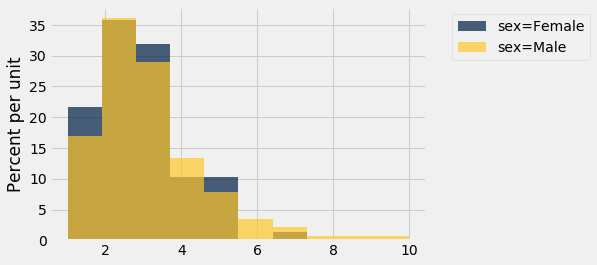

In [5]:
tips.select('tip','sex').hist('tip',group='sex')

### b. Repeat part a, but broken down by time.

It seems that dinner tips are higher than lunch on average.


In [6]:
np.mean(tips.where('time',ds.are.equal_to('Dinner')).column('tip'))

3.102670454545454

In [7]:
np.mean(tips.where('time',ds.are.equal_to('Lunch')).column('tip'))

2.728088235294118

C:\Users\C20Pierce.Pluemer\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


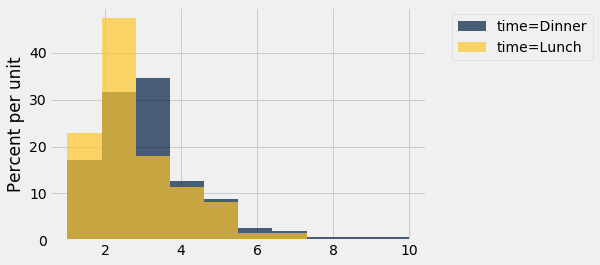

In [8]:
tips.select('tip','time').hist('tip',group='time')

## 2)	Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [9]:
def weekday_to_num(Day):
    "Return an integer based on the day of the week given"

    if Day == "Mon":
        return 1
    elif Day == "Tues":
        return 2
    elif Day == "Wed":
        return 3
    elif Day == "Thur":
        return 4
    elif Day == "Fri":
        return 5    
    elif Day == "Sat":
        return 6 
    elif Day == "Sun":
        return 7    
    else:
        return "Enter Valid Data!!!!!!!!!"

## 3)	Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num. 

In [10]:
tips = tips.with_columns('weekday_num',tips.apply(weekday_to_num,'day'))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


## 4)	Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of 20, we will simply look at all total bills near 20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of 1, we will look at all bills totaling 19 thru 21. The output of this function will be the predicted tip amount. 

In [11]:
def est_tip(total_bill):
    """ 
    The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this,
    we will look at “nearby” values 
    (i.e. tip, where the value of total_bill is near the value of interest.)
    """
    
    estimate = tips.where('total_bill', ds.are.between(total_bill-1,total_bill+1)).column('tip')
    
    return np.mean(estimate)
    

In [12]:
#test
tips.where('total_bill', ds.are.between(4,6)).column('tip')

array([1.])

In [13]:
#test
est_tip(5)

1.0

## 5)	Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount

In [14]:
tips = tips = tips.with_columns('estimated tip',tips.apply(est_tip,'total_bill'))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num,estimated tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,7,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,7,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,7,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,7,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,7,4.19909
8.77,2,Male,No,Sun,Dinner,2,7,1.865
26.88,3.12,Male,No,Sun,Dinner,4,7,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,7,2.426
14.78,3.23,Male,No,Sun,Dinner,2,7,2.43833


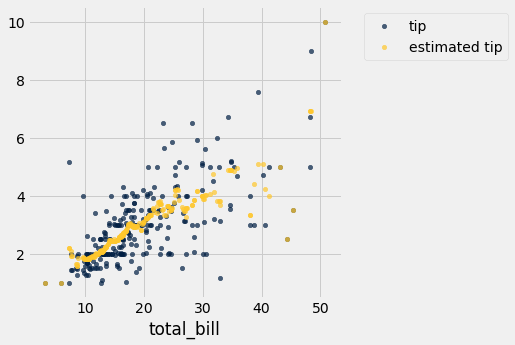

In [15]:
tips.select('total_bill','tip','estimated tip').scatter('total_bill')